# DATA6550 – Visualization Ethics and Communication
## Titanic Dataset Analysis

##  Project Overview

This notebook analyzes survival patterns in the Titanic dataset.
The objective is to demonstrate how visualization design choices can either communicate information ethically or distort interpretation.

The notebook contains:
- Two accurate visualizations
- Two intentionally misleading visualizations

##  Import Libraries and load Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 140
df = pd.read_csv("C:/Users/venud/Downloads/DATA-6550/data/train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()
df.isna().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

## Data Preparation

Missing values are handled and necessary transformations are applied to improve clarity of visualization.

In [9]:
# Fill missing Age values first
df["Age"] = df["Age"].fillna(df["Age"].median())

# Create AgeGroup column
bins = [0, 12, 59, 100]
labels = ["Child (0–12)", "Adult (13–59)", "Senior (60+)"]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)

# Create FamilySize column
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

df[["SibSp", "Parch", "FamilySize"]].head()

df.head()

# Create FamilySize 
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# Create FamilyCategory
def family_category(x):
    if x == 1:
        return "Alone"
    elif x <= 4:
        return "Small Family (2–4)"
    else:
        return "Large Family (5+)"

df["FamilyCategory"] = df["FamilySize"].apply(family_category)

df[["FamilySize", "FamilyCategory"]].head()

,FamilySize,FamilyCategory
0,2,Small Family (2–4)
1,2,Small Family (2–4)
2,1,Alone
3,2,Small Family (2–4)
4,1,Alone


## Accurate Visualizations


## Accurate 1: Survival Rate by Fare Category

C:\Users\venud\AppData\Local\Temp\ipykernel_29328\739633052.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_rates = df.groupby("FareGroup")["Survived"].mean() * 100


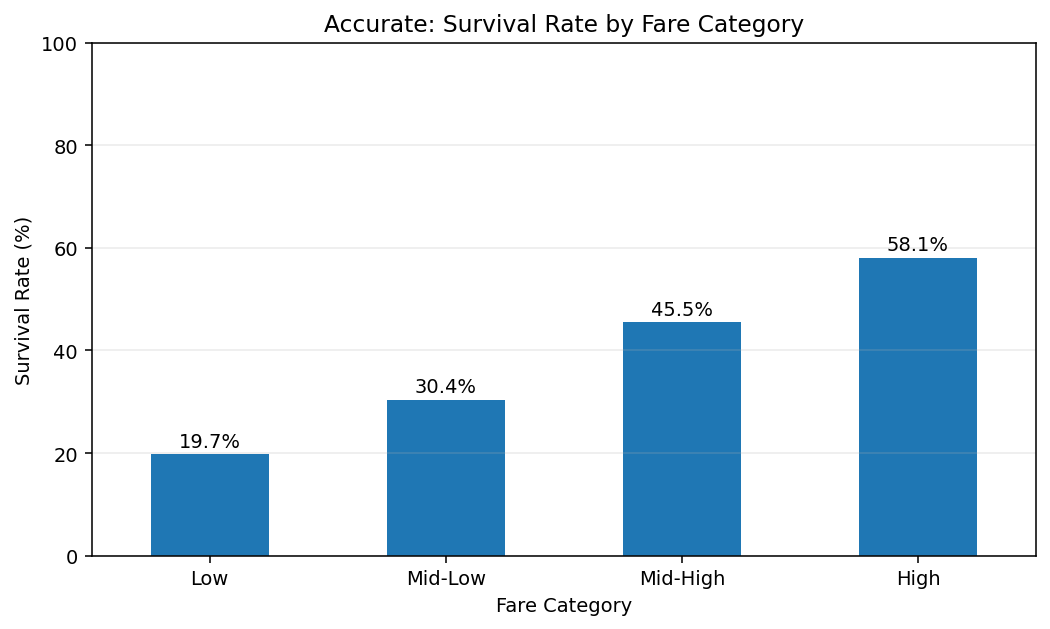

In [13]:
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

df["FareGroup"] = pd.qcut(df["Fare"], 4, labels=["Low", "Mid-Low", "Mid-High", "High"])

fare_rates = df.groupby("FareGroup")["Survived"].mean() * 100

fig, ax = plt.subplots(figsize=(7.6,4.6))
fare_rates.plot(kind="bar", ax=ax)

ax.set_title("Accurate: Survival Rate by Fare Category")
ax.set_xlabel("Fare Category")
ax.set_ylabel("Survival Rate (%)")
ax.set_ylim(0,100)
ax.grid(axis="y", alpha=0.25)

for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+1.5,
            f"{p.get_height():.1f}%", ha="center")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

This bar chart shows the survival rate for passengers based on their ticket fare category. The fares are divided into four groups from low to high. The y-axis starts at zero, which makes the comparison between groups fair and accurate. The chart clearly shows that passengers who paid higher fares had a higher survival rate. This visualization is ethical because it uses survival percentages instead of raw counts, includes the full dataset, and does not exaggerate the differences between groups.

## Accurate 2: Survival Rate by Family Size

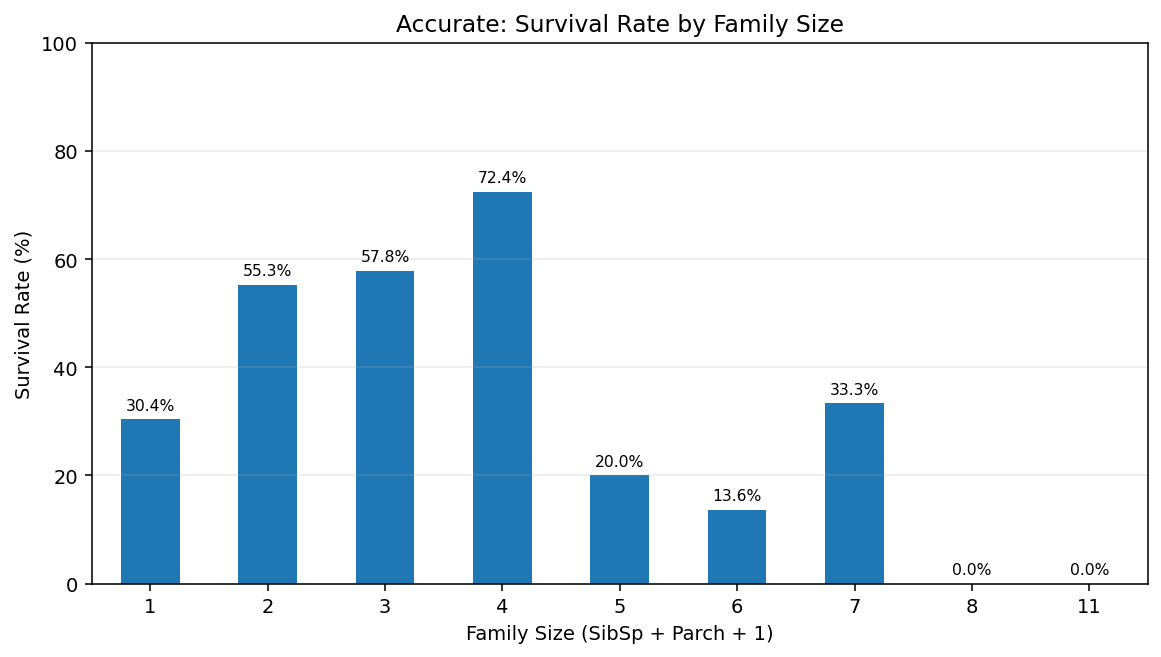

In [17]:
fam_rates = df.groupby("FamilySize")["Survived"].mean() * 100

fig, ax = plt.subplots(figsize=(8.4, 4.8))
fam_rates.plot(kind="bar", ax=ax)

ax.set_title("Accurate: Survival Rate by Family Size")
ax.set_xlabel("Family Size (SibSp + Parch + 1)")
ax.set_ylabel("Survival Rate (%)")
ax.set_ylim(0, 100)
ax.grid(axis="y", alpha=0.25)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 1.2,
            f"{p.get_height():.1f}%", ha="center", va="bottom", fontsize=8)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

This bar chart shows survival rates based on whether passengers were traveling alone, with a small family or with a large family. The y-axis begins at zero so that the differences between categories are shown correctly. The chart makes it easier to understand how family size may have influenced survival. This visualization is ethical because it uses percentage values, compares all passengers, and presents the data without manipulating the scale.

## Misleading Visualizations

## Misleading 1: Stacked Counts by Family Category 

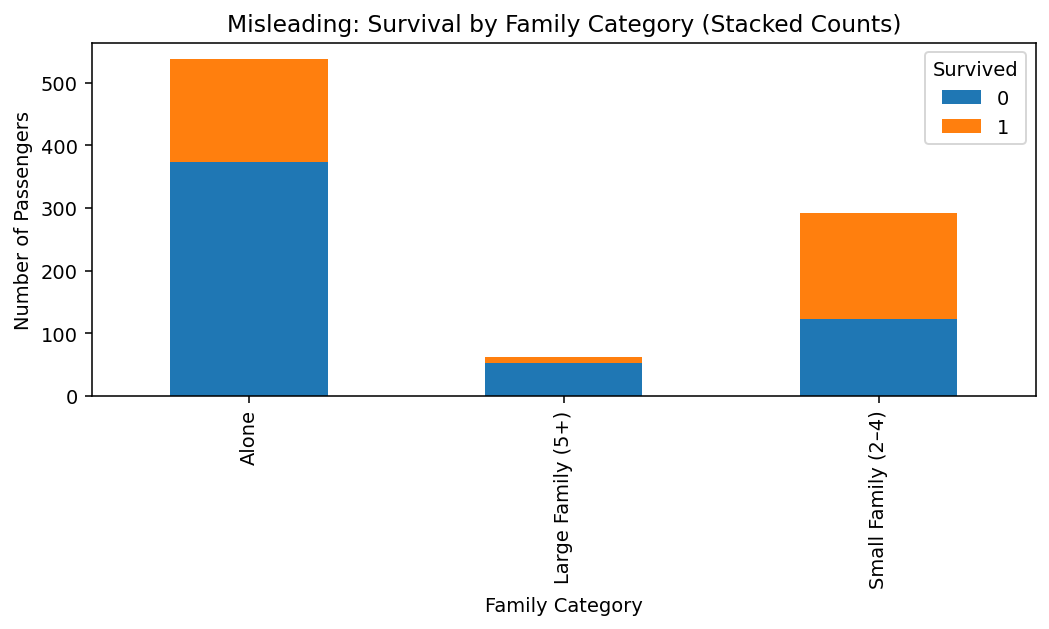

In [22]:
family_counts = pd.crosstab(df["FamilyCategory"], df["Survived"])

family_counts.plot(kind="bar", stacked=True, figsize=(7.6,4.6))

plt.title("Misleading: Survival by Family Category (Stacked Counts)")
plt.xlabel("Family Category")
plt.ylabel("Number of Passengers")
plt.tight_layout()
plt.show()

This stacked bar chart shows the number of survivors and non-survivors in each family category. However, it displays raw counts instead of survival rates. Because the group sizes are different, this can be misleading. A larger group may appear to have better survival simply because there are more people in that group. This chart demonstrates how using counts instead of percentages can distort interpretation and create confusion about actual survival probability.

## Misleading 2: Exploded pie chart of Survivors by Age Group

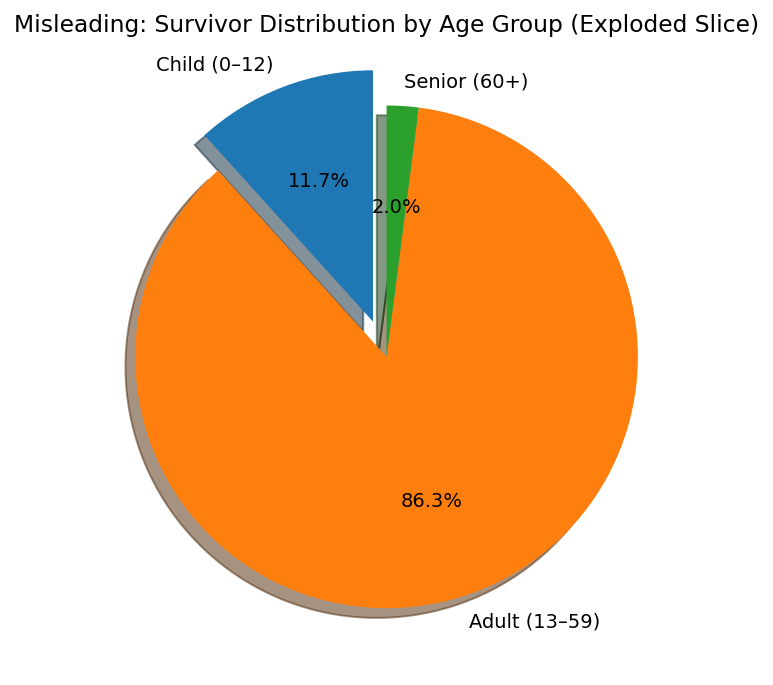

In [26]:
 df["Age"] = df["Age"].fillna(df["Age"].median())
bins = [0, 12, 59, 100]
labels = ["Child (0–12)", "Adult (13–59)", "Senior (60+)"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)

age_survivors = df[df["Survived"] == 1]["AgeGroup"].value_counts().reindex(labels)

explode = [0.15, 0, 0]  # exaggerate "Child" slice

fig, ax = plt.subplots(figsize=(7, 5))
ax.pie(
    age_survivors,
    labels=age_survivors.index,
    autopct="%1.1f%%",
    startangle=90,
    explode=explode,
    shadow=True
)
ax.set_title("Misleading: Survivor Distribution by Age Group (Exploded Slice)")
plt.tight_layout()
plt.show()

This pie chart shows the distribution of survivors across different age groups. One slice is slightly separated from the rest, which draws extra attention to that category. Although the data values are correct, the visual emphasis makes that group appear more important than others. This demonstrates how styling choices, such as exploding a slice or adding visual emphasis, can influence how viewers interpret the data, even when the numbers themselves are unchanged.

## Conclusion

This project helped me understand how powerful visualization design can be. The accurate charts clearly showed how survival rates changed based on fare category and family size. Using percentages and starting the y-axis at zero made the comparisons fair and easy to understand.

On the other hand, the misleading visualizations showed how small changes can affect interpretation. Using stacked counts instead of survival rates can confuse viewers because group sizes are different. Also, visual emphasis such as highlighting certain categories, can make some groups appear more important than they actually are. Even though the data does not change, the way it is presented can influence how people interpret it.

Overall, this project shows that data visualization requires responsibility. Clear labels, proper scaling, and honest comparisons are important to ensure that the message is accurate and not misleading.